# Визуализация

На этом семинаре мы поймём, как строить графики, показывающие разные характеристики текстов.

На самом деле это довольно просто!

[Ссылка](https://colab.research.google.com/drive/17oUxOwVQpo-SdFaLDZwEHA3IZx4VCcZX?usp=sharing) на тетрадку в Google Colab

Импортируем нужные для работы модули

In [89]:
#Работа с таблицами — понадобится, чтобы хранить наш корпус
import pandas as pd

#Выполнение быстрых математических вычислений — пригодится, потому что иначе
#корпус с большим количеством текстов может долго обрабатываться
import numpy as np

#Модуль для работы с графиками
import matplotlib.pyplot as plt

#Ещё модуль построения графиков (строит красивые графики без лишних усилий)
import seaborn as sns
sns.set()

Выкачиваем корпус, который мы создали на предыдущих семинарах. Он будет храниться в табличке Pandas, и что особенно приятно, графики будут строиться на основании таких табличек — ни в какой другой вид их преобразовывать не надо.

In [4]:
#Считываем из файла выкачанный раньше корпус: файл с текстами и словами

corpus_link = 'https://raw.githubusercontent.com/alekseyst/text_analysis_2023/main/Seminar_5/panorama_corpus.tsv'
panorama_corpus = pd.read_csv(corpus_link, sep='\t')

corpus_link_words = 'https://raw.githubusercontent.com/alekseyst/text_analysis_2023/main/Seminar_6/panorama_corpus_words.tsv'
panorama_corpus_words = pd.read_csv(corpus_link_words, sep='\t')

## Столбчатые диаграммы

Простой способ показать частотность каких-то конкретных слов и сравнить их между собой.

<AxesSubplot:xlabel='lemma', ylabel='count'>

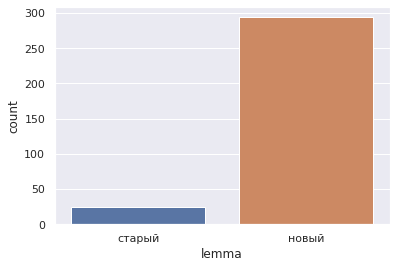

In [15]:
#Фильтруем нужные нам слова

new_old = panorama_corpus_words[panorama_corpus_words['lemma'].isin(['новый', 'старый'])]


#Рисуем диаграмму одной функцией, которая всё посчитает
sns.countplot(x=new_old['lemma'])

In [27]:
#Рисуем диаграмму по агрегированным данным
for_barplot = new_old[['lemma']].groupby('lemma', as_index=False).size()
for_barplot

<AxesSubplot:xlabel='lemma', ylabel='size'>

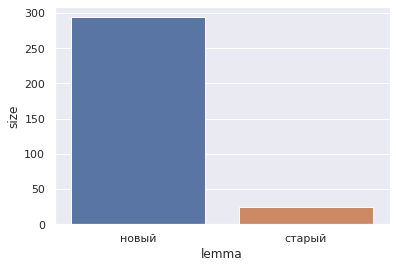

In [28]:
#Рисуем диаграмму по агрегированным данным
sns.barplot(x='lemma', y='size', data=for_barplot)

<AxesSubplot:xlabel='lemma', ylabel='size'>

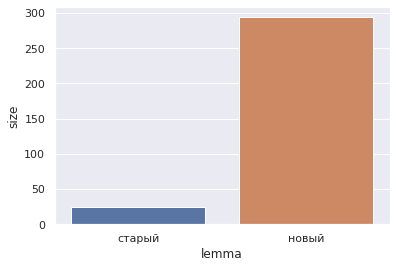

In [29]:
#Как мы видим, порядок элементов вышел разным... Мы можем его менять

order_list = ['старый', 'новый']
sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list)

[Text(0.5, 0, 'Слово'), Text(0, 0.5, 'Количество вхождений')]

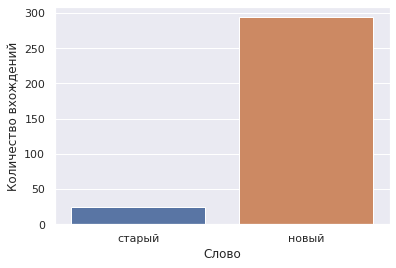

In [32]:
#Конечно, мы можем кастомизировать и много всего другого на этих и других графиках

#Например, поменять названия осей

#Для этого сначала запишем график в переменную
ax = sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list)

#Поменяем названия
ax.set(xlabel='Слово', ylabel='Количество вхождений')

<AxesSubplot:xlabel='lemma', ylabel='size'>

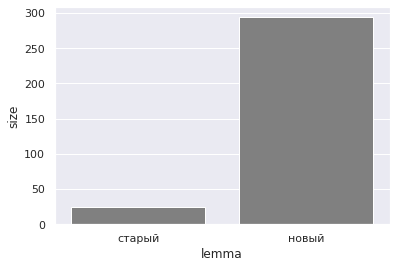

In [34]:
#Например, поменять цвета

sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list,
            color='gray')

<AxesSubplot:xlabel='lemma', ylabel='size'>

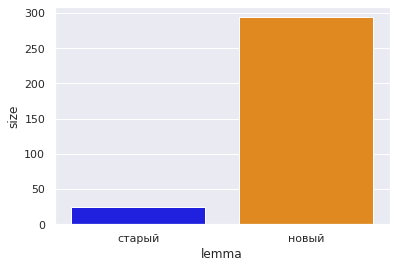

In [39]:
#Или так

sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list,
            palette=['blue', '#FF8C00'])

<AxesSubplot:xlabel='lemma', ylabel='size'>

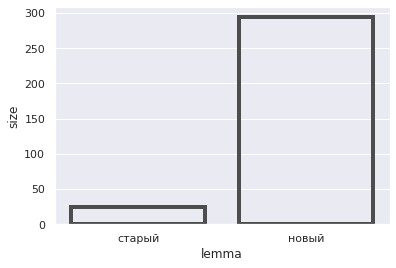

In [45]:
#Или так

sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list,
            linewidth=4, edgecolor=".3", facecolor=(0, 0, 0, 0))

В целом, варьировать график можно в очень широких пределах. Естественно, не только для столбчатых диаграмм, но и для других типов графиков. Обычно, чтобы понять, как это сделать, достаточно сформулировать запрос в поисковике (лучше в Гугле и на английском).

## Задание

Постройде диаграмму, которая показывает соотношение в употребительности трёх любых слов. Дайте осям диаграммы осмысленные названия. Раскрасьте каждый из столбиков в недефолтный цвет.

In [ ]:
#Впишите сюда код



In [85]:
#Теперь мы, например, можем увидеть в действии закон Ципфа, который говорит, что
#частотность слова убывает обратно пропорционально его порядковому номеру в частотном списке

#Построим частотный список и отсортируем слова по частотности
freq_list = panorama_corpus_words[panorama_corpus_words['pos'] != 'PUNCT']
freq_list = freq_list[['lemma']].groupby('lemma', as_index=False).size()
freq_list = freq_list.sort_values(by=['size'], ascending=False)

freq_list

,lemma,size
1785,в,4142
4511,и,2732
6842,на,1725
7178,не,1109
14309,что,1060
...,...,...
6355,меандер,1
6356,мебель,1
6360,медведица,1
6365,медельине,1


In [86]:
#Сбрасываем автоматическую нумерацию
freq_list.reset_index(drop=True).head(10)

,lemma,size
0,в,4142
1,и,2732
2,на,1725
3,не,1109
4,что,1060
5,с,999
6,-,888
7,по,830
8,год,685
9,из,643


<AxesSubplot:xlabel='lemma', ylabel='size'>

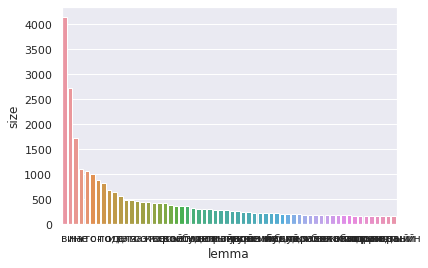

In [100]:
#Строим график

sns.barplot(x='lemma', y='size', data=freq_list[:60])

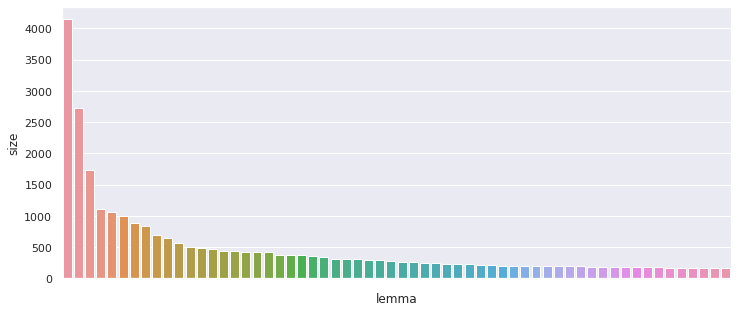

In [99]:
#Кажется, сами слова из обозначений лучше убрать, а график сделать побольше

fig, ax = plt.subplots(figsize=(12, 5))

zipfplot = sns.barplot(x='lemma', y='size', data=freq_list[:60], ax=ax)
zipfplot.set(xticklabels=[])
pass #Эта штука нужна, чтобы нам не вывели кучу мусора

##Графики для численных данных

To be continued... 